<a href="https://colab.research.google.com/github/yiwenwangANU/Tensorflow_Certificate/blob/main/Tensorflow_Certificate_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Basic Classification

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import layers

In [2]:
path_to_file = tf.keras.utils.get_file('Churn_Modelling.csv', 'https://raw.githubusercontent.com/yiwenwangANU/Tensorflow_Certificate/main/Churn_Modelling.csv')

In [3]:
df_raw = pd.read_csv(path_to_file)
df_raw.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df = df_raw.iloc[:, 3:]
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

cat_features = ["Geography"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

ct = ColumnTransformer(transformers=[("cat", # any name
                                      categorical_transformer, # transformer
                                      cat_features)], # feature in list
                       remainder='passthrough',
                       verbose_feature_names_out=False) # New column will not have remainder_ in the front

df = pd.DataFrame(ct.fit_transform(df),
                  columns=ct.get_feature_names_out())

In [7]:
df

,Geography_France,Geography_Germany,Geography_Spain,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.0,0.0,0.0,619.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,0.0,0.0,1.0,608.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,1.0,0.0,0.0,502.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,1.0,0.0,0.0,699.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,0.0,0.0,1.0,850.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,771.0,1.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64,0.0
9996,1.0,0.0,0.0,516.0,1.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77,0.0
9997,1.0,0.0,0.0,709.0,0.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58,1.0
9998,0.0,1.0,0.0,772.0,1.0,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52,1.0


In [8]:
# from sklearn.model_selection import train_test_split
# df_features = df.iloc[:, :-1]
# df_target = df.iloc[:, -1]
# X_train, X_test, y_train, y_test = train_test_split(df_features,
#                                                     df_target,
#                                                     test_size = 0.2,
#                                                     random_state = 0)

In [9]:
train = df.sample(frac=0.8) #random state is a seed value
test = df.drop(train.index)

X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]
X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

In [10]:
X_train

,Geography_France,Geography_Germany,Geography_Spain,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6054,1.0,0.0,0.0,633.0,0.0,47.0,0.0,0.00,1.0,1.0,1.0,6342.84
3824,1.0,0.0,0.0,667.0,1.0,44.0,2.0,122806.95,1.0,0.0,0.0,15120.86
3706,0.0,0.0,1.0,629.0,0.0,44.0,6.0,125512.98,2.0,0.0,0.0,79082.76
196,0.0,0.0,1.0,616.0,0.0,32.0,6.0,0.00,2.0,1.0,1.0,43001.46
373,0.0,1.0,0.0,802.0,1.0,31.0,1.0,125013.72,1.0,1.0,1.0,187658.09
...,...,...,...,...,...,...,...,...,...,...,...,...
678,0.0,0.0,1.0,788.0,0.0,70.0,1.0,0.00,2.0,1.0,1.0,41610.62
7390,0.0,0.0,1.0,596.0,1.0,20.0,3.0,187294.46,1.0,1.0,0.0,103456.47
1022,1.0,0.0,0.0,547.0,0.0,48.0,1.0,179380.74,2.0,0.0,1.0,69263.10
5147,1.0,0.0,0.0,669.0,0.0,38.0,9.0,121858.98,1.0,1.0,0.0,130755.34


In [11]:
y_train

6054    1.0
3824    0.0
3706    0.0
196     0.0
373     0.0
       ... 
678     0.0
7390    0.0
1022    0.0
5147    0.0
5294    0.0
Name: Exited, Length: 8000, dtype: float64

In [12]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [13]:
normal_layer = layers.Normalization(axis=-1)
normal_layer.adapt(X_train)

In [14]:
model = tf.keras.Sequential([
  tf.keras.Input(shape=(12,)),
  normal_layer,                           
  layers.Dense(16, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(1, activation='sigmoid'),                            
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [15]:
# inputs = layers.Input(shape=(12,))
# x = layers.Dense(16, activation='relu')(inputs)
# x = layers.Dense(16, activation='relu')(x)
# outputs = layers.Dense(1, activation='sigmoid')(x)
# model = tf.keras.Model(inputs, outputs)

# model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
#               optimizer=tf.keras.optimizers.Adam(),
#               metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense (Dense)               (None, 16)                208       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 522
Trainable params: 497
Non-trainable params: 25
_________________________________________________________________


In [17]:
model.fit(X_train,
          y_train,
          epochs=30,
          batch_size = 32,
          validation_data=(X_test, y_test),
          callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True),
                     tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=2, verbose=1)])

Epoch 1/30
250/250 [==============================] - 3s 7ms/step - loss: 0.5264 - accuracy: 0.7515 - val_loss: 0.4376 - val_accuracy: 0.8165 - lr: 0.0010
Epoch 2/30
250/250 [==============================] - 2s 6ms/step - loss: 0.4424 - accuracy: 0.8018 - val_loss: 0.4166 - val_accuracy: 0.8280 - lr: 0.0010
Epoch 3/30
250/250 [==============================] - 1s 5ms/step - loss: 0.4261 - accuracy: 0.8110 - val_loss: 0.4038 - val_accuracy: 0.8350 - lr: 0.0010
Epoch 4/30
250/250 [==============================] - 1s 6ms/step - loss: 0.4084 - accuracy: 0.8236 - val_loss: 0.3844 - val_accuracy: 0.8550 - lr: 0.0010
Epoch 5/30
250/250 [==============================] - 2s 6ms/step - loss: 0.3836 - accuracy: 0.8388 - val_loss: 0.3617 - val_accuracy: 0.8605 - lr: 0.0010
Epoch 6/30
250/250 [==============================] - 1s 5ms/step - loss: 0.3649 - accuracy: 0.8509 - val_loss: 0.3504 - val_accuracy: 0.8670 - lr: 0.0010
Epoch 7/30
250/250 [==============================] - 1s 6ms/step - lo

#Basic Regression

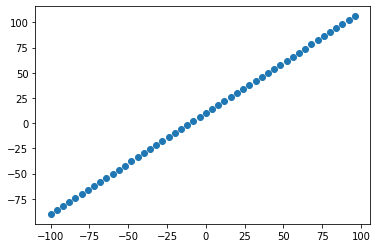

In [18]:
import matplotlib.pyplot as plt
X = np.arange(-100, 100, 4)
y = np.arange(-90, 110, 4)
plt.scatter(X, y)

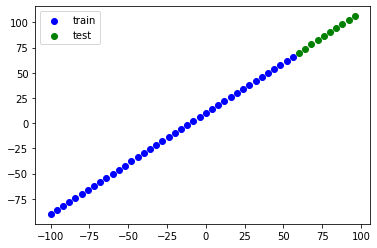

In [19]:
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

plt.scatter(X_train, y_train, c='b', label='train')
plt.scatter(X_test, y_test, c='g', label='test')
plt.legend()

In [20]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(16),
  tf.keras.layers.Dense(1) 
], name='model')

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [21]:
import os 
def create_model_checkpoint(model_name, save_path="model_checkpoints"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name, ""), 
                                            verbose=0, 
                                            save_weights_only=True,
                                            save_best_only=True)

In [22]:
model.fit(tf.expand_dims(X_train, axis=-1),
          y_train,
          epochs=100,
          verbose=0,
          validation_data=(tf.expand_dims(X_test, axis=-1),
                           y_test),
          callbacks=[create_model_checkpoint(model_name=model.name)])

In [23]:
model.load_weights("model_checkpoints/model/")
model.compile(loss=tf.keras.losses.mae,
                   optimizer=tf.keras.optimizers.SGD(),
                   metrics=['mae'])
y_predict = model.predict(X_test)
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 178ms/step - loss: 1.0662 - mae: 1.0662


[1.066185712814331, 1.066185712814331]

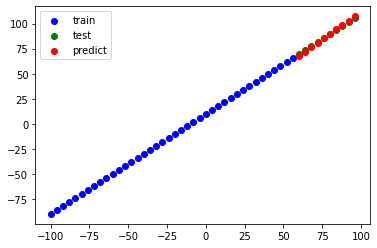

In [24]:
plt.scatter(X_train, y_train, c='b', label='train')
plt.scatter(X_test, y_test, c='g', label='test')
plt.scatter(X_test, y_predict, c='r', label='predict')
plt.legend()